<a href="https://colab.research.google.com/github/kasanalakshya/Pulsar-Star-/blob/main/Copy_of_PulsarStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv('/content/pulsar_data_train.csv')

In [ ]:
print(df.head())

    Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                        

In [ ]:
print(df.shape)

(12528, 9)


We will handle missing values

lets check  first how many missing values exists.

In [ ]:
print(df.isnull().sum())

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64


Now removing rows with missing values

In [ ]:
df_cleaned=df.dropna()

First check if our coloumn exists or not?

In [ ]:
print('Excess kurtosis of the integrated profile' in df.columns)


False


Now checking is there any extra space or any hidden space in  our coloumn name

In [ ]:
for col in df.columns:
    print(f"'{col}'")


' Mean of the integrated profile'
' Standard deviation of the integrated profile'
' Excess kurtosis of the integrated profile'
' Skewness of the integrated profile'
' Mean of the DM-SNR curve'
' Standard deviation of the DM-SNR curve'
' Excess kurtosis of the DM-SNR curve'
' Skewness of the DM-SNR curve'
'target_class'


Now as we have seen there are few extra spaces in our coloumns name jo aage jaake dikkat krdegi while writing code so better STRIP it

In [ ]:
df.columns = df.columns.str.strip()


I am trying to plot my data into graph  form to check whether my data is Normally distributed or skewed

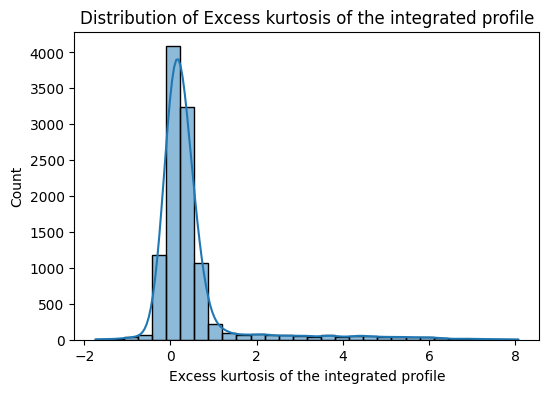

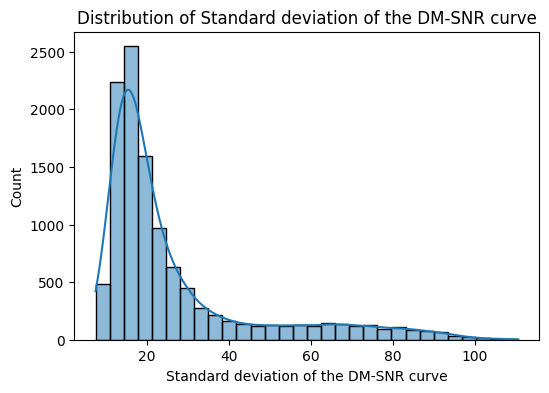

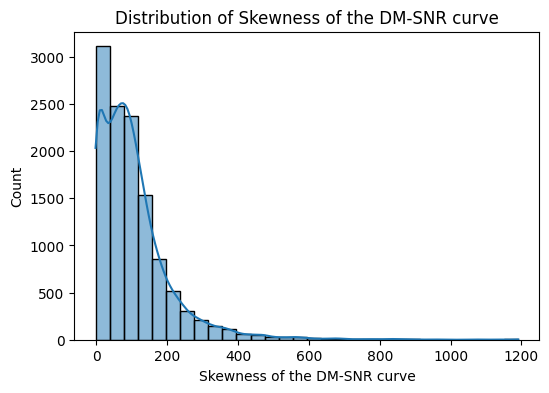

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_missing = [
    'Excess kurtosis of the integrated profile',
    'Standard deviation of the DM-SNR curve',
    'Skewness of the DM-SNR curve'
]

for col in columns_missing:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)  # Using 'col' instead of all columns
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
df['Excess kurtosis of the integrated profile'].fillna(df['Excess kurtosis of the integrated profile'].mean(), inplace= True)
df['Standard deviation of the DM-SNR curve'].fillna(df['Standard deviation of the DM-SNR curve'].mean(), inplace=True)
df['Skewness of the DM-SNR curve'].fillna(df['Skewness of the DM-SNR curve'].mean(), inplace=True)

<ipython-input-12-1dae6f8d7c59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Excess kurtosis of the integrated profile'].fillna(df['Excess kurtosis of the integrated profile'].mean(), inplace= True)
<ipython-input-12-1dae6f8d7c59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

WHY THIS WARNING HAPPENING????

Pandas is warning that inplace operations (i.e., inplace=True) might not work in future versions of Pandas (3.0+). The issue arises because Pandas sometimes treats df[col] as a copy instead of a reference to the original data, leading to unexpected behavior.

To avoid this warning we are filling values(mean) uisng different syntax(updatetd one)

In [ ]:
df['Excess kurtosis of the integrated profile'] = df['Excess kurtosis of the integrated profile'].fillna(df['Excess kurtosis of the integrated profile'].mean())

df['Standard deviation of the DM-SNR curve'] = df['Standard deviation of the DM-SNR curve'].fillna(df['Standard deviation of the DM-SNR curve'].mean())

df['Skewness of the DM-SNR curve'] = df['Skewness of the DM-SNR curve'].fillna(df['Skewness of the DM-SNR curve'].mean())


Selecting all feature columns (excluding 'target_class')

We are not selecting target class because target variable (or dependent variable) is the column the model is trying to predict.

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_cols = df.columns[:-1]

scaler = StandardScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols])

print(df.head())

   Mean of the integrated profile  \
0                        0.393989   
1                       -1.327257   
2                        0.761306   
3                        1.766787   
4                       -1.022022   

   Standard deviation of the integrated profile  \
0                                      0.272252   
1                                     -1.521273   
2                                      0.986368   
3                                      0.344739   
4                                     -1.529786   

   Excess kurtosis of the integrated profile  \
0                                  -0.104295   
1                                   0.237151   
2                                  -0.349264   
3                                  -0.702837   
4                                   0.350606   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.288585                 -0.321013   
1                            0.259381          

Now here we are Selecting all feature columns (excluding 'target_class')

Basically, This snippet is about separating the feature columns and the target column in our dataset before applying machine learning models.

IMPORTANT NOTE FOR CONCEPT

In supervised learning, the features (X) are the inputs, and the target (y) is the output. We exclude the target column because we don’t use it as an input for training.

In [ ]:

feature_cols = df.columns[:-1]  #yaha saara coloumn except the last one
X = df[feature_cols]  # technically these are your (input data)
y = df['target_class']  # and this Target variable is (output data)

print(X.head())  # Checking selected features
print(y.head())  # Checking target values


#Feature selection ensures that the model doesn’t mistakenly use the target column as an input

#This step is necessary before applying algorithms like Support Vector Machine (SVM), Decision Trees, etc.

   Mean of the integrated profile  \
0                        0.393989   
1                       -1.327257   
2                        0.761306   
3                        1.766787   
4                       -1.022022   

   Standard deviation of the integrated profile  \
0                                      0.272252   
1                                     -1.521273   
2                                      0.986368   
3                                      0.344739   
4                                     -1.529786   

   Excess kurtosis of the integrated profile  \
0                                  -0.104295   
1                                   0.237151   
2                                  -0.349264   
3                                  -0.702837   
4                                   0.350606   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.288585                 -0.321013   
1                            0.259381          

Splitting data into 80% testing and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets check the shape of new sets

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Training set shape:", X_test.shape, y_test.shape)

Training set shape: (10022, 8) (10022,)
Training set shape: (2506, 8) (2506,)


Now its time to train our MODEL and for that we will be using Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

Initializing a SVM classifier

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


Training the Model on the training data 5 times(for better accuracy)

In [ ]:
for i in range(1, 301):  # Simulate 5 epochs
    print(f"\nTraining SVM Model - Attempt {i}")
    svm_model.fit(X_train, y_train)  # Training the model
    y_pred = svm_model.predict(X_test)  # Predicting on test data



Training SVM Model - Attempt 1

Training SVM Model - Attempt 2

Training SVM Model - Attempt 3

Training SVM Model - Attempt 4

Training SVM Model - Attempt 5

Training SVM Model - Attempt 6

Training SVM Model - Attempt 7

Training SVM Model - Attempt 8

Training SVM Model - Attempt 9

Training SVM Model - Attempt 10

Training SVM Model - Attempt 11

Training SVM Model - Attempt 12

Training SVM Model - Attempt 13

Training SVM Model - Attempt 14

Training SVM Model - Attempt 15

Training SVM Model - Attempt 16

Training SVM Model - Attempt 17

Training SVM Model - Attempt 18

Training SVM Model - Attempt 19

Training SVM Model - Attempt 20

Training SVM Model - Attempt 21

Training SVM Model - Attempt 22

Training SVM Model - Attempt 23

Training SVM Model - Attempt 24

Training SVM Model - Attempt 25

Training SVM Model - Attempt 26

Training SVM Model - Attempt 27

Training SVM Model - Attempt 28

Training SVM Model - Attempt 29

Training SVM Model - Attempt 30

Training SVM Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)

In [ ]:
y_pred = svm_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9796
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [ ]:

from sklearn.metrics import accuracy_score, classification_report

nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.9433
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2279
         1.0       0.64      0.84      0.73       227

    accuracy                           0.94      2506
   macro avg       0.81      0.90      0.85      2506
weighted avg       0.95      0.94      0.95      2506



In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.9637
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2279
         1.0       0.80      0.80      0.80       227

    accuracy                           0.96      2506
   macro avg       0.89      0.89      0.89      2506
weighted avg       0.96      0.96      0.96      2506



Printing first 10 predictions

In [ ]:
print(y_pred[:10])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Lets try taking Input


In [ ]:
new_data = [[100, 40, 0.5, -0.2, 3, 20, 8, 70]]
prediction = svm_model.predict(new_data)
print("Predicted class:", prediction)



Predicted class: [0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
print(X_train.shape, y_train.shape)
print(X_train.isnull().sum())
print(X_train.dtypes)


(10022, 8) (10022,)
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
dtype: int64
Mean of the integrated profile                  float64
Standard deviation of the integrated profile    float64
Excess kurtosis of the integrated profile       float64
Skewness of the integrated profile              float64
Mean of the DM-SNR curve                        float64
Standard deviation of the DM-SNR curve          float64
Excess kurtosis of the DM-SNR curve             float64
Skewness of the DM-SNR curve                    float64
dtype: object


In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/PulsarStars.ipynb"


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (assuming a CSV file with 'label' and 'message' columns)
# You can replace this with any appropriate dataset of your choice
# Dataset example format:
# label,message
# ham,Hello, how are you?
# spam,Get free money now!

df = pd.read_csv("spam.csv")  # Change the path to your dataset file

# Inspect the dataset
print(df.head())

# Preprocess data: Extract features (message) and target (label)
X = df['message']  # Feature (SMS content)
y = df['label']    # Target (ham/spam)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the text data into numerical form using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Using stop words to remove common words (like "the", "and")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report and confusion matrix for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'